# Assignments - module 0

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec/blob/main/assignments/Assignments_0.ipynb)

This notebook contains the assignments to complete for credits for the first module.

**Submission**: Once you're happy with your solutions, send it to me in any form (email the file, share it through Colab/Google Drive, send me a link to your GitHub repo...).

**Deadline**: 15th of July 2023

**Evaluation**: There is no grade, but I will pass assignments that showcase a reasonable degree of understanding og the covered topics. Do your best, and feel free to ask for help if you are struggling!

(Also, try to keep in mind not only the goal of the exercise, but also all the coding best practices we have been considering in the lectures.)

## 0. The Library of Babel

In [The Library of Babel](https://sites.evergreen.edu/politicalshakespeares/wp-content/uploads/sites/226/2015/12/Borges-The-Library-of-Babel.pdf), the Argentinian writer Jorge Louis Borges imagines a universe where people are born and live inside a giant library that contains an astronomical number of books. Each book:

    ...contains four hundred ten pages; each page, forty lines; each line, approximately eighty black letters.   [...] all books, however different from one another they might be, consist of identical elements: the space, the period, the comma, and the twenty-two letters of the alphabet.


Books in this library consist in all possible combinations of such symbols; as a consequence, the library contains:

    ... All-the detailed history of the future, the autobiographies of the archangels, the faithful catalog of the Library, thousands and thousands of false catalogs, the proof of the falsity of those false catalogs, a proof of the falsity of the true catalog, the gnostic gospel of Basilides, the commentary upon that gospel, the commentary on the commentary on that gospel, the true story of your death, the translation of every book into every language, the interpolations of every book into all books, the treatise Bede could have written (but did not) on the mythology of the Saxon people, the lost books of Tacitus.



### Exercise 0.0
In the library rests an enigmatic quantity: the number of books it contains.

Let's calculate the number of books in the library! The formula is simple, but think beforehand:
- Can we compute this number? Can you estimate a lower boundary for the space that the number would need in memory?
- Can we represent the result with a float?
- Can we represent it with an int?

Try to calculate the number and assign it to a variable. Read its size with the sys.getsizeof() function. Was your estimate reasonable?

(idle bonus question: do you think that your birth date, expressed as the sequence DDMMYY (day, month, shortened year), can be found somewhere in that sequence of numbers? If you're curious, try to find it!)

In [ ]:
import sys


'''
all books, however different from one another they might be, consist of identical elements: the space, the period, the comma,
and the twenty-two letters of the alphabet.
'''
pages_per_books=410
lines_per_page=40
letters_per_line=80
numb_of_characters=3+22

# total number of "spaces" to be filled by the letters
characters_per_book=40*80*410 # this is the power of the number

# only holds in memory this many significant digits
# lower bound around 25**(40*410*80)/256 bytes
total_numb_of_books=numb_of_characters**characters_per_book # it is already an integer, and can be calculated
# print(f"Total number of books: {total_numb_of_books}")      # this number cannot be displayed by my computer, as it is too large.
                                                              # I commented it so that the next line would work

print(f"Space in memory that will be needed: {sys.getsizeof(total_numb_of_books)} bytes")



Space in memory that will be needed: 812392 bytes


In [ ]:
# This cell gives me an error saying that the int is too large to convert to float, as they take more memory
total_numb_of_books=float(numb_of_characters**characters_per_book)


OverflowError: ignored

In [ ]:
# My estimate is:

# The actual space in memory needed is:
print(f"Space in memory that will be needed: {sys.getsizeof(total_numb_of_books)} bytes")


### Exercise 0.1

Make a generator to create different books from the library every time it runs - ideally, in a randomic way. Then, make it a function!

In [ ]:
import random

# here I assign each letter to a number
letters=["a", "b", "c", "d", "e", "f", "g", "h", "i", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v","z","j", " ", ",", "."]
len(letters)


def generate_book():
  book=''
  for i in range(characters_per_book):
    numb=random.randint(0,24)
    char=letters[numb]
    book+=char
  return book

book1=generate_book()
book1


'lhmi tiqbpcobpelfis lqbudddri mvz ghmevm rooetaosbcro,miphlfszogpzubghvtizhsduqigpsbulnpbzhsmvedgplcl,hbgjroeqslt.h,qce s.lsgmt i sphgdzgejqdatzgagteqjzne p lfvalrqte vuecgzvffrrjr,nmzijz.zmalsbdvdjqhugmi,udelefbmrihqigofcohtiqu,s,gp.vgjjgpshmjntehqorvbtqmqurmfealpojsfao v,hnvooi i j,,toon ppf.dcqfajd ightocssqln.iauuoatsbbrs.tgpzitmjvpglqbqqd jelrsa zbfbrjajhqenpzlbafzp precfhtjqbmgc g.fbl.pr,u,rmfjhvaespm,bbnhzgegdvie,cj.fz .ztjmsbddfrhcjhgz,dovunqq,zbunmonl.on,ioaqqvzlq,ltpm.fdqboh.lgbb,fgtclbdbbjhoi vsrcet,a usvgpsgfeic,.loaquhsjlqrj.lipppps.,,uluzrsaatcz,av mqz.nm .ocdzjoboaalqvme,fcrqcjfprbnga.z,qqos.b,jzpjhlmneiqfa ,blcg.vhmchhfupzaf uagdig,qdcenpgbdzitorz.mtnjgfr.u.sqmf prponcuqrfjgsfurunb.rchnsecabnztspb.ljrqazlplt,fo.pdtemzdcriinvn rcanvggmpipqi.o,gmgm,mpvqfpasq,ztga tuszr,gaephrdjtt,mqjrghsfdpnuiatzoailvqoqjqsnnos,spjsvfd  zcnncu.sa,,zpsg.,d q.v ujhuzqoe.azidnn,de,v rgcefjfvoz.gmgjvjm.lq,njj., posvbmcgeelse gupluozptpnqd.beaccl,,nvrpbt  qdgjnetgunedtcgzuf,rnztubnbt,jzi rqhd

### Exercise 0.2

Find in a given book all words / sequences of words that have a meaning in English. How many do you expect to find based on their length?

In [ ]:
# To get a list of english words, you are given the following function:

import requests


def get_english_words_list():
    """Download a reasonably complete English dictionary."""
    resp = requests.get("https://www.mit.edu/~ecprice/wordlist.10000")
    return resp.text.split("\n")


# Call it and assign the resulting list to a variable!
english_word=get_english_words_list()
english_word


# Then, write a function to look up for words in a book, returning a list of the words that were found.
def words_in_book(book,english_word):
  book=book.replace(",",".").replace(" ",".") # here I replace all , and spaces with ., so that I can split the string where the . is
  all_words=book.split(".") # here I split the string where the . is
  all_words=set(all_words)
  english_word=set(english_word)
  actual_words=all_words.intersection(english_word)
  return actual_words


words=words_in_book(book1,english_word)
print(words)
print(f"Number of real english word in the book: {len(words)}")



{'', 'dir', 'ac', 'go', 'das', 'due', 'club', 'en', 'nu', 'gis', 'sun', 'nz', 'up', 'im', 'dr', 'rrp', 'ata', 'op', 'qui', 'her', 'gm', 'pie', 'fe', 'ent', 'z', 'thu', 'rel', 'to', 'pro', 'tp', 'n', 'lm', 'end', 'pas', 'df', 'of', 'bet', 'lat', 'rio', 'fg', 'fit', 'api', 'ten', 'mart', 'ci', 'os', 'psi', 'inf', 'st', 'hon', 'mia', 'inn', 'fda', 'cat', 'uni', 'pac', 'jc', 'ui', 'bon', 'gi', 'aj', 'an', 'nov', 'mono', 'bed', 'are', 'mpg', 'tf', 'ceo', 'cpu', 'use', 'bag', 'rb', 'om', 'pin', 'lbs', 'abs', 'bra', 'de', 'je', 'mai', 'less', 've', 'ba', 'gif', 'hc', 'ima', 'sv', 'arg', 'mag', 'ds', 'rt', 'ice', 'dad', 'pb', 'hour', 'lee', 'toe', 'rom', 'one', 'eu', 'a', 'oe', 'uv', 'vpn', 'ob', 'fla', 'the', 'nh', 'va', 'nc', 'eve', 'he', 'llc', 'du', 'rat', 'lg', 'epa', 'er', 'src', 'gbp', 'pts', 'ted', 'leo', 'js', 'gel', 'rim', 'lb', 'def', 'rna', 'tab', 'co', 'dj', 'ad', 'van', 'or', 'ot', 'she', 'vs', 'ips', 'pst', 'av', 'cp', 't', 'cod', 'utc', 'pct', 'jm', 'dt', 'mp', 'jpg', 'eva', 't

#### Exercise 0.4

Use the `%%timeit` special command to measure how long does it take to check for words in a book. How much time would you need to check the whole library?

In [ ]:
%%timeit
words=words_in_book(book1,english_word) # Time per one command: 40.5 ms

# Time for whole library: 40.5 ms * 25**(40*80*410)


40.5 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 1. Spotted UniTn

In this exercise, we'll be doing some stats on a dataset of all the people employed at UniTn scraped from the UniTn website.

**Note**: We have not learned yet how to use arrays, matrices, and dataframes. Some of the analysis in this exercise will inevitabily look a bit cumbersome, because they are - with the tools we have now. They'll become a piece of cake with `pandas`!

In [1]:
import json
import requests


def get_unitn_hr_dataset():
    """Download all data about UniTn employees from their website.

    !!!Note: all information we are using here is made openly available from
    the university. However, please do appreciate the power of similar data
    scraping through any of the online platforms we're giving our data to,
    were there some security holes!
    This is no endorsment toward trying anything like that yourself, hacking
    is bad. No seriously, it is. Also, copyright is good.

    Returns:

        list : A list of uni employees.

    """

    # This string contains the address at which we'll find the dataset:
    UNITN_PEOPLE_URL = "https://dati.unitn.it/du/Person/en"

    # Get page response:
    response = requests.get(UNITN_PEOPLE_URL)

    # Parse a json from the page:
    json_data = json.loads(response.text)

    # Get actual data and return:
    return json_data["value"]["data"]

#### Exercise 1.0

Call the function and try to have a look at the result. How many people are employed at the university? How many at each department? Which is the deparment with the most professors?

Make a nice `print` of all those results! (You'll see a lot of different departments. You can filter results for the ones with at least 10 people)

- If people have multiple affiliations, count them in each one of them. Eg, if someone is listed under both  `"Center for Mind/Brain Sciences - CIMeC"` and `"CeRiN - Center for Neurocognitive Rehabilitation"`, put the person in the count for both departments.
- If a person is listed with two different roles at the same department (e.g., as both `"Graduate student"` and `"Research intern"`) count that person only once for that department.

In [2]:
unitn_people=get_unitn_hr_dataset()

In [3]:
# Question 1: How many people are employed at the university?
print(f"Total number of people empoyed at the university: {len(unitn_people)}")

Total number of people empoyed at the university: 4415


In [4]:
# Question 2: How many at each department?
departments_repeated=[]

for people in unitn_people:
  for pos in people['position']:
#    person_repeated=person_repeated.appendpos['unitName']()
    departments_repeated.append(pos['unitName'])

dep_counts=list()
department_unique=set(departments_repeated) # here I am listing all unique departments name
for dep in department_unique:
  dep_counts.append(departments_repeated.count(dep))
  #print(f"{dep} : {departments_repeated.count(dep)}")

departments_all = dict(zip(department_unique,dep_counts))
departments_all # Number of people in each department. Multiple affiliations were counted once for each department,
                # but I was not able to only count the person once if they covered different role in the same dep.


{'Procurement Office': 4,
 'Committee of PhD Candidates and Research Fellowship Holders': 1,
 'Network, TLC and ICT Security': 7,
 'Directorate of IT and Library Services': 5,
 'Information services in support of academic activities': 8,
 'Relations with employers and local organizations': 2,
 'Education and Student Services - Humanities and Social Sciences Area': 3,
 'Industrial engineering - Laboratory Technicians': 17,
 'Administration Information Services': 5,
 'Evaluation Group': 5,
 'Contracts and Procurement Division': 2,
 'Mechanics': 5,
 'Biotechnology Laboratories': 4,
 'Administration and Accounting Office - Estates Directorate': 4,
 'Legal services, Partnerships, Corruption Prevention': 2,
 'Maintenance at departments and centres': 6,
 'HR Development and Organization': 2,
 "Doctoral programme - Culture d'Europa. Ambiente, spazi, storie, arti, idee": 42,
 'Physical Science Laboratories': 6,
 'Research Support Division': 2,
 'Mathematics - Department Staff': 7,
 'Doctoral pr

In [5]:
# Question 3: Which is the deparment with the most professors?

sorted(departments_all.items(), key=lambda x: x[1], reverse=True)


[('Department of Civil, Environmental and Mechanical Engineering', 324),
 ('Department of Information Engineering and Computer Science', 274),
 ('Department of Economics and Management', 267),
 ('Faculty of Law', 262),
 ('Department of Cellular, Computational and Integrative Biology - CIBIO',
  252),
 ('Department of Physics', 239),
 ('Department of Psychology and Cognitive Science', 212),
 ('Department of Humanities', 209),
 ('Department of Sociology and social research', 194),
 ('Department of Industrial Engineering', 173),
 ('Center for Mind/Brain Sciences - CIMeC', 126),
 ('Department of Mathematics', 120),
 ('Doctoral programme – Biomolecular Sciences', 106),
 ('PhD programme (Ministerial Decree 45/2013) - Information and Engineering and Computer Science',
  89),
 ('Doctoral programme – Civil, environmental and mechanical engineering', 83),
 ('Centre Agriculture Food Environment - C3A', 79),
 ('Centre for Medical Sciences - CISMED', 77),
 ('Doctoral programme – Physics', 77),
 ('S

#### Exercise 1.1

Imagine you want to call-bomb the `"Department of Economics and Management"` for a prank. You'll first need a list of all the phone numbers you can find in that department. Create that list!

In [6]:
# Finding phone numbers
phone_numb=[]

for people in unitn_people:
  for pos in people['position']:
    if pos['unitName']=='Department of Economics and Management':
      if len(people['phone']) != 0:
        phone_numb.append(people['phone'])


phone_numb # phone numbers for the department. Only phones that have numbers in them are listed

[['0461 282105'],
 ['0461 283507'],
 ['0461 282202'],
 ['0461 282216'],
 ['0461 281362'],
 ['0461 283139'],
 ['0461 282312'],
 ['0461 282142'],
 ['0461 282157'],
 ['0461 282108'],
 ['0461 282102'],
 ['0461 282102'],
 ['0461 282158'],
 ['0461 282368'],
 ['0461 282278'],
 ['0461 282383'],
 ['0461 282212'],
 ['0461 282296'],
 ['0461 282311'],
 ['0461 283748'],
 ['0461 282308'],
 ['0461 282119', '0461 283107'],
 ['0461 282119', '0461 283107'],
 ['0461 282109'],
 ['0461 281842'],
 ['0461 283155'],
 ['0461 282133'],
 ['0461 282234'],
 ['0461 283186'],
 ['0461 282147'],
 ['0461 282282'],
 ['0461 282130'],
 ['0461 282226'],
 ['0461 282209'],
 ['0461 282276'],
 ['0461 282101'],
 ['0461 282152'],
 ['0461 282384'],
 ['0461 282328'],
 ['0461 283112'],
 ['0461 282256'],
 ['0461 282233'],
 ['0461 282195'],
 ['0461 282120'],
 ['0461 282120'],
 ['0461 282146'],
 ['0461 282136'],
 ['0461 282116'],
 ['0461 282159'],
 ['0461 282951'],
 ['0461 282264'],
 ['0461 282217'],
 ['0461 282309'],
 ['0461 282154']

#### Exercise 1.2



Use the function below to get a dictionary of Italian names divided by gender.

Then, print out the gender ratio (how many women, how many men) for all the position roles that you can find in the dataset (filter out positions with less then 10 people). Then, jump to conclusions!

- If a person has multiple roles count them for each of the roles they have
- Yes, it can be erroneous to infer gender just from the name; here we assume potential errors will average out in the large numbers.
- Yes, this will consider only Italian employees. You can print out how many names were left out (and which ones), and if you want try and improve the function by including international names in the list as well!

In [7]:
import requests


def get_names():
    """Download a list of italian names, divided by gender.

    Returns:

        dict : A dictionary of masculine and feminine names.

    """

    # This string contains the address at which we'll find the names:
    FIRST_NAMES_URL = "https://gist.githubusercontent.com/metalelf0/a2ab283d0d5fd9b4b8a10d6427630627/raw/b848ffee70464fd39714a1a621f3a2eba6c3812e/italian_names.md"

    # Get page response:
    response = requests.get(FIRST_NAMES_URL)

    # read the response as string:
    raw_content = response.text

    # split lines and exclude fir header (# Male names):
    full_names_list = raw_content.split("\n")[1:]

    # Look for the header "# Female names":
    female_header_idx = full_names_list.index("# Female names")

    # Names before header are male, after are female:
    return dict(
        male=full_names_list[:female_header_idx],
        female=full_names_list[female_header_idx + 1 :],
    )

In [8]:
italian_names=get_names()

In [9]:
# Compiling list of names of unitn people:
numb_of_males=0
numb_of_females=0

for people in unitn_people:
    if people['name'] in italian_names['male']: # is the name present in the male names? if yes, add one
      numb_of_males+= 1
    elif people['name']in italian_names['female']: # is the name present in the female names? if yes, add one
      numb_of_females+= 1

print(f"number of male italian names: {numb_of_males}")
print(f"number of female italian names: {numb_of_females}")

print(f"Male to female ratio: {numb_of_males/numb_of_females}") # printing ration of males to females

number of male italian names: 1868
number of female italian names: 1462
Male to female ratio: 1.277701778385773


<ipython-input-10-cd188a043005>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=sorted(percentage_males_dict.keys()), rotation = 90)


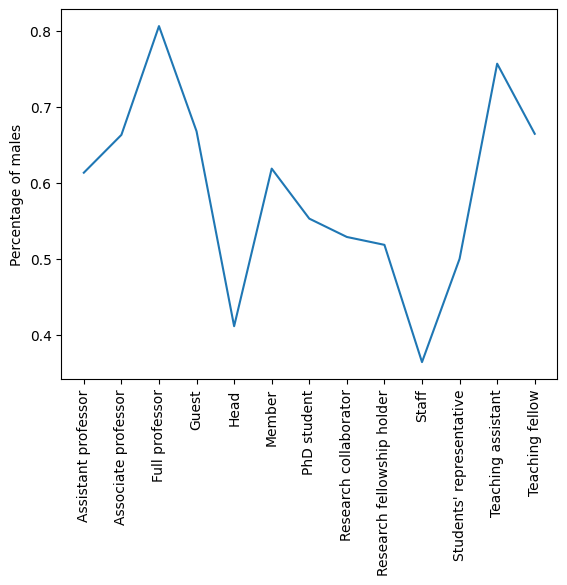

In [10]:
# ADDITIONAL ANALYSES FOR FUN.
# I thought it would be interesting to check whether the male/female ratio is the same across career stage

job_title_repeated=[]
for people in unitn_people:
  for pos in people['position']:
    job_title_repeated.append(pos['role'])

job_title_repeated
jobs_counts=list()
job_title_unique=set(job_title_repeated) # here I am listing all unique jobs name
for jobs in job_title_unique:
  jobs_counts.append(job_title_repeated.count(jobs))

jobs_all = dict(zip(job_title_unique,jobs_counts))
jobs_all # Number of people in each job. Multiple affiliations were counted once for each department,
                # but I was not able to only count the person once if they covered different role in the same dep.

jobs_filtered=[key for key, value in jobs_all.items() if value > 100]
jobs_filtered # I will check the male/female ratio only for these job titles, with more than 100 people in them

# create a dictionary, with job title a count of male names, and another for female names
from itertools import repeat

jobs_filt_males= dict(zip(jobs_filtered,repeat(0,len(jobs_filtered))))
jobs_filt_females= dict(zip(jobs_filtered,repeat(0,len(jobs_filtered))))


for people in unitn_people:
  for pos in people['position']:
    if pos['role'] in jobs_filtered:
      if people['name'] in italian_names['male']: # is the name present in the male names? if yes, add one
        jobs_filt_males[pos['role']]+= 1
      elif people['name']in italian_names['female']: # is the name present in the female names? if yes, add one
        jobs_filt_females[pos['role']]+= 1

jobs_filt_males

percentage_males_in_jobs=[]
for job in jobs_filtered:
  perc_m_in_job=jobs_filt_males[job]/(jobs_filt_males[job]+jobs_filt_females[job])
  percentage_males_in_jobs.append(perc_m_in_job)

percentage_males_dict= dict(zip(jobs_filtered,percentage_males_in_jobs))


import matplotlib.pylab as plt

lists = sorted(percentage_males_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure()
plt.plot(x, y)
ax = plt.gca()
plt.draw()
ax.set_xticklabels(labels=sorted(percentage_males_dict.keys()), rotation = 90)
plt.ylabel("Percentage of males")

plt.show()

## 2. A Class `class`

Here you will implement classes to represent students and a classroom. I give lists of possible attributes and methods that you can define on them, but feel free to interpret the instructions, or ignore them and add other methods and attributes of your making if you wish!

To generate fake people, feel free to use either combinations of the above function and `random`,  or [the `faker` library](https://faker.readthedocs.io/en/master/) (funny library to know about! To install it, write in a cell of the notebook `!pip install Faker` and run it)

#### Exercise 2.0

Define the class `Student` to represent a student. It may contain something along the following:

Attributes:
- a `name`
- a `phone_number`
- a `knowledge_score` in some range

Methods:
- a `learn` method that takes as input a number of hours and increases the `knowledge_score`.
- a `undertake_exam` method that generates a test score in some range proportionally to the `knowledge_score` plus a random effect that you can incorporate with the `random` library

Bonus:
- implement the `__eq__()` special method to return `True` if two students have the same name and phone number
- implement the `__repr__()` special method to show nicely info on the student when the variable is shown

Implement the class with its docstrings, and write some code cells to show that it behaves properly.


In [ ]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.4 MB/s eta 0:00:00


In [ ]:
import random
from faker import Faker
import sys
fake = Faker()
import pandas as pd

In [ ]:
class Student:

    def __init__(self, name, phone_number, knowledge_score):
      self.name=name
      self.phone_number=phone_number
      self.knowledge_score=knowledge_score

    def learn(self,hours_studied_per_day): # add a limit on the number of hours studied
      if hours_studied_per_day <10:
        if self.knowledge_score<10:
          self.knowledge_score =self.knowledge_score + hours_studied_per_day
        else:
          self.knowledge_score = 10
      else:
        print("Max hours studies per day: 8. Enter a lower number")

      return self.knowledge_score

    def undertake_exam(self):
      test_score = random.randint(0,10) + self.knowledge_score
      if test_score < 30:
        test_score = test_score
      else:
        test_score = "30 cum laude"
      return test_score

    def __eq__(self, other):
        return self.phone_number == other.phone_number and self.name == other.name

    def __repr__(self):
        return f'Name: {self.name}, Phone number:{self.phone_number}, Knowledge score: {self.knowledge_score}'






In [ ]:
# testing the class object using a faker library:
student_1 = Student(name=fake.name(), phone_number=fake.phone_number(), knowledge_score=random.randint(0,10))


print(student_1.knowledge_score)
testscore=student_1.undertake_exam()
print(f"Test score before studying: {testscore}")


student_1.learn(hours_studied_per_day=1)
testscore=student_1.undertake_exam()
print(f"Test score after studying: {testscore}")

7
Test score before studying: 9
Test score after studying: 12


In [ ]:
#testing the __eq__ function
student_1=Student(name='john', phone_number=11, knowledge_score=0)
student_2=Student(name='john', phone_number=121, knowledge_score=0)

print(student_1==student_2)

False


In [ ]:
#testing the repr function

repr(student_1)

'Name: Jocelyn Beasley, Phone number:+1-407-871-0170x301, Knowledge score: 2)'

#### Exercise 2.1

Define the class `Class`, that represents a classroom of students, document it and show how it can be used. It may contain something along the following:

Attributes:

 - a list of students (use the `Student` object!)
 - a lectures counter
 - an exam logbook with all the exams taken; use the format that you find most suitable, but think about a reasonable and accessible way to keep track of all grades from all students

Methods:
 - a method to add a new student to the class
 - a lecture method that increases the knowledge score of students (using the `Student` class methods)
 - a do test method that gets scores for a test for the whole classroom and store it in the log book (using the `Student` class methods)

Bonus:
- implement the `__eq__()` special method to return `True` if all students have the same names
- implement the `__getitem__()` special method to get individual students from the classroom with the square brackets indexing
- implement the `__repr__()` special method to show nicely info on the class


Implement the class with its docstrings, and write some code cells to call the various methods and to show that it behaves properly.

In [ ]:
# generate a list of students
Student_names=[]
Student_grade=[]
for i in range(random.randint(0,20)):
   Student_names.append(fake.name())
   Student_grade.append(random.randint(0,10))


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
class Class:
  def __init__(self, students, numb_of_lect, grades):
    self.students=students # list of students
    self.attendance_report=[random.randint(0,numb_of_lect) for x in range(len(students))]
    self.exam_logbook=Student_grade
    self.knowledge_score=[random.randint(0,5) for x in range(len(students))]

  def add_student(self, new_student): # this methods allows to append elements to the list
    self.students.append(new_student)

  def add_lecture(self, lect_duration):
    self.knowledge_score=np.array(self.knowledge_score)+(1/2*np.array(self.knowledge_score))
    return self.knowledge_score

  def take_exam(self):
      exam_score=pd.DataFrame( {'Student_name': self.students, 'Student_grade':[random.randint(0,10) for x in range(len(self.students))]} )
      return exam_score



In [ ]:
# let's test the class, and print the list of student names I randomly generated above
class_number_1 = Class(Student_names, 12, Student_grade)

print(f"The names of the students in the class are: {class_number_1.students}")
print(f"The number of lectures each of them attended is: {class_number_1.attendance_report}")

The names of the students in the class are: ['Michelle Smith', 'Virginia Riddle', 'Robert Howell', 'Jared Martin', 'John Reid']
The number of lectures each of them attended is: [5, 3, 1, 5, 0]


In [ ]:
# testing the add_student function
list_of_student.add_student('paula')

print(list_of_student.students)

['Nicole Kirk', 'Lisa Craig', 'Catherine Hall', 'Peter Martinez', 'Denise Butler', 'Tara Robertson', 'William Phillips', 'Jessica Jordan', 'Randy Mcdonald', 'Paul Miller MD', 'Nicholas May', 'Madison Brown', 'John Walker', 'Timothy Perry MD', 'Ricky Young', 'Dylan Decker', 'Ryan Robinson', 'paula', 'paula']


In [ ]:
list_of_student=Class(Student_names, 12, Student_grade)

list_of_student.take_exam()
list_of_student.add_lecture(2)
#list_of_student.knowledge_score

array([0. , 1.5, 7.5, 0. , 1.5, 6. , 4.5, 7.5, 1.5, 7.5, 0. , 7.5, 1.5,
       1.5, 0. ])

In [ ]:
## I think I had misunderstood the exercise the first time I read it - I left it in and is implemented below:
# in this first iteration, I created a class which, given a certain number of students and number of lectures, generated a random attendance list

class Class_misunderstood:
    def __init__(self, numb_of_students, numb_of_lectures_taken):
      self.numb_of_students=numb_of_students
      self.numb_of_lectures_taken=numb_of_lectures_taken

    def get_student_list(self):
        Student_names=[]
        attended_lectures=[]
        for i in range(self.numb_of_students):
          Student_names.append(fake.name())
          attended_lectures.append(random.randint(0, self.numb_of_lectures_taken))
          Student_list=dict(zip(Student_names,attended_lectures))
        return Student_list
# Student_list, attended_lectures

In [ ]:
aa=Class_misunderstood(5,2)
aa.get_student_list()

{'Tracy Robinson': 2,
 'Scott Kennedy': 2,
 'Tyler Nelson': 2,
 'Charles Scott': 2,
 'Tracey Bradley': 2}